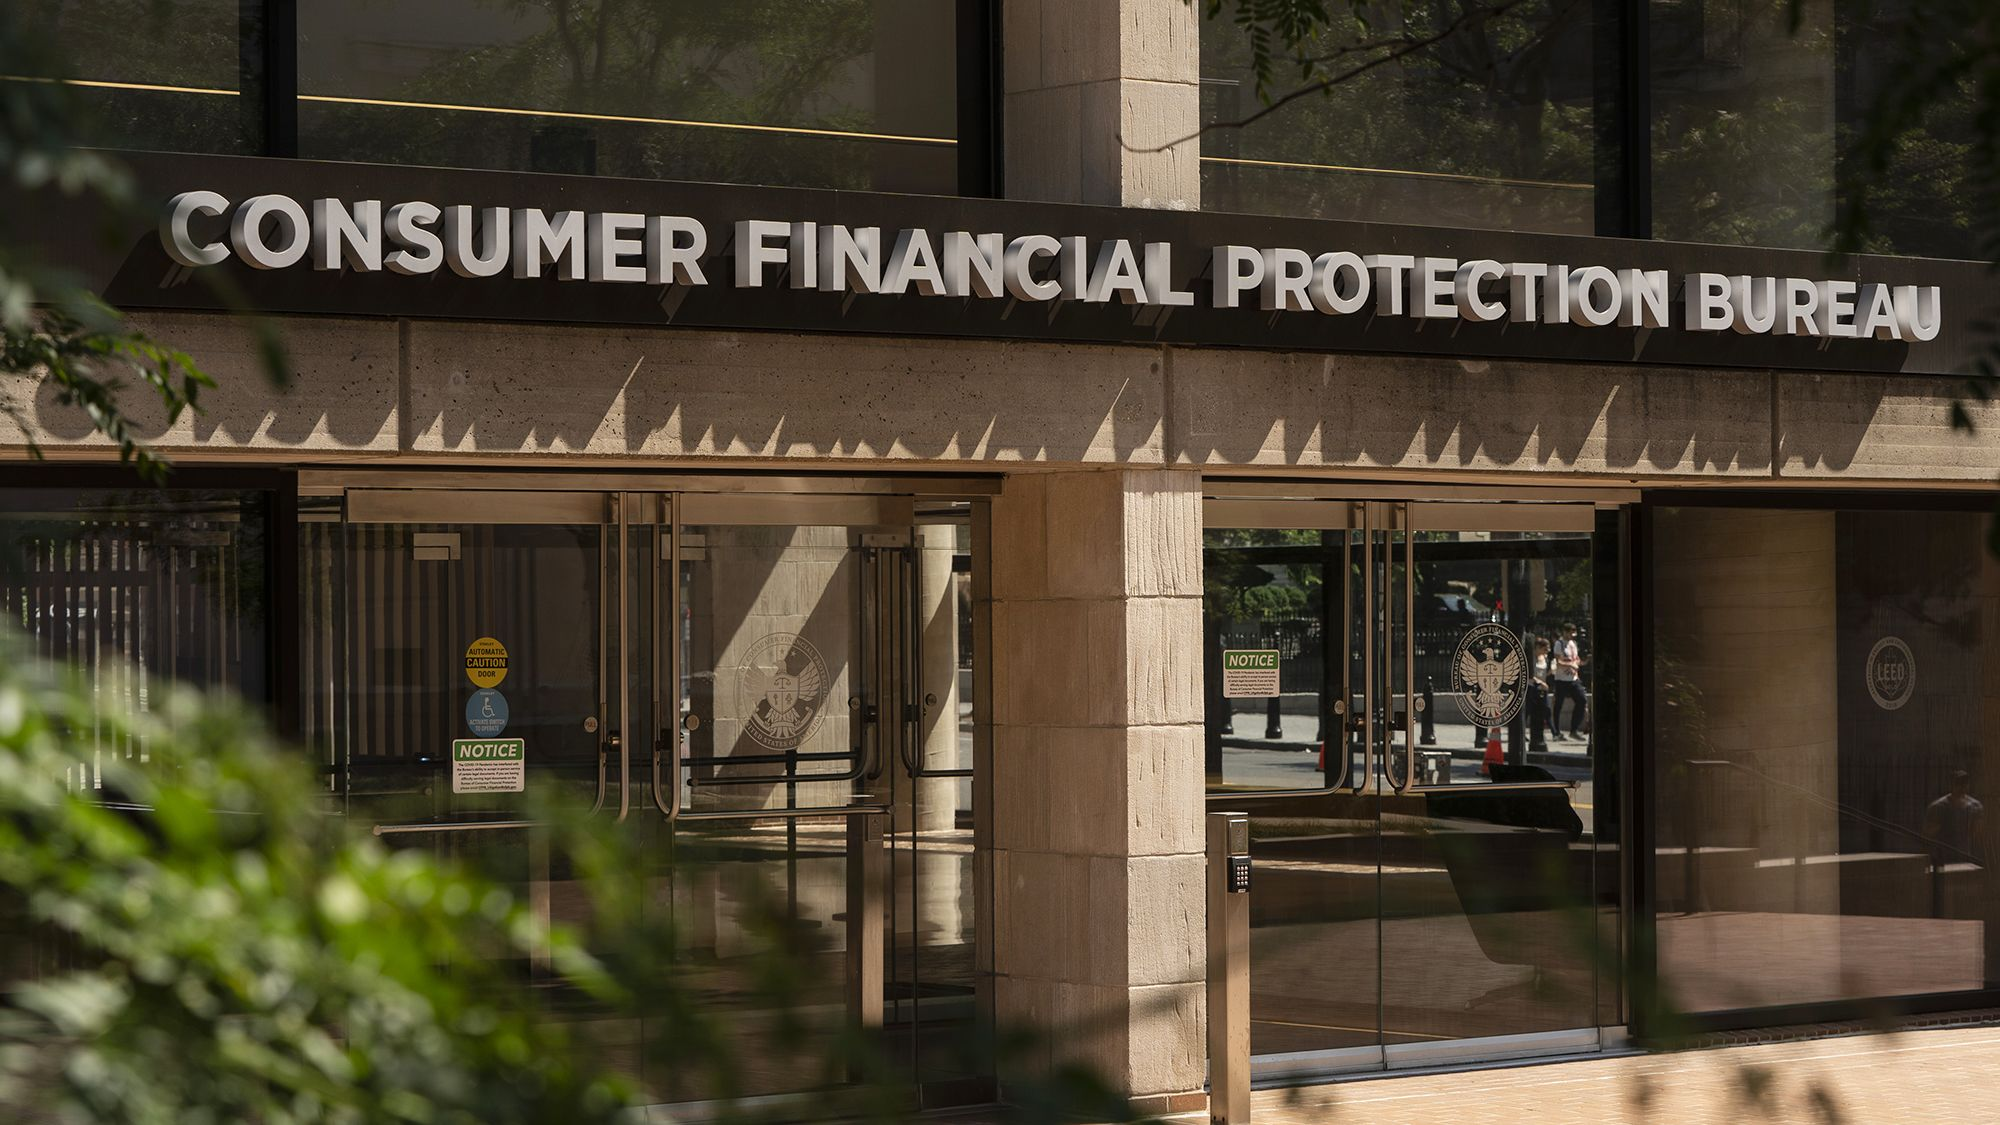


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Importing Libraries
   </p>
</div>


In [106]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime , date
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.
   </p>
</div>



In [109]:
data = pd.read_csv('Extracted data.csv', encoding='latin1')

In [111]:
data.head()

ï»¿Date received                                            Product  \
0         27/01/25  Credit reporting or other personal consumer re...   
1         15/01/25  Credit reporting or other personal consumer re...   
2         15/01/25  Credit reporting or other personal consumer re...   
3         14/01/25  Credit reporting or other personal consumer re...   
4         10/02/25  Credit reporting or other personal consumer re...   

        Sub-product                                 Issue  \
0  Credit reporting  Incorrect information on your report   
1  Credit reporting           Improper use of your report   
2  Credit reporting           Improper use of your report   
3  Credit reporting           Improper use of your report   
4  Credit reporting  Incorrect information on your report   

                                           Sub-issue  \
0                Information belongs to someone else   
1  Credit inquiries on your report that you don't...   
2  Credit inquiries on your report that you don't...   
3      Reporting company used your report improperly   
4                Information belongs to someone else   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

                                  Company State ZIP code Tags  \
0     Experian Information Solutions Inc.    LA    70816  NaN   
1     Experian Information Solutions Inc.    TX    773XX  NaN   
2  TRANSUNION INTERMEDIATE HOLDINGS, INC.    TX    773XX  NaN   
3  TRANSUNION INTERMEDIATE HOLDINGS, INC.    GA    30096  NaN   
4  TRANSUNION INTERMEDIATE HOLDINGS, INC.    TX    75154  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN           Web             27/01/25   
1                      Other           Web             15/01/25   
2                      Other           Web             15/01/25   
3                        NaN           Web             14/01/25   
4                        NaN           Web             10/02/25   

  Company response to consumer Timely response? Consumer disputed?  \
0                  In progress              Yes                NaN   
1                  In progress              Yes                NaN   
2                  In progress              Yes                NaN   
3                  In progress              Yes                NaN   
4                  In progress              Yes                NaN   

   Complaint ID  
0      11786560  
1      11519763  
2      11514486  
3      11513332  
4      12015072

In [113]:
data.describe()

Complaint ID
count  4.501000e+03
mean   1.065247e+07
std    1.574304e+06
min    1.529710e+06
25%    8.296798e+06
50%    1.158314e+07
75%    1.180122e+07
max    1.205809e+07

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       TEXT Preprocessing
   </p>
</div>


In [196]:
columns_to_drop = ['Sub-product', 'Issue', 'Sub-issue', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Date received']
data = data.drop(columns=columns_to_drop, errors='ignore')

In [198]:
data.head()

ï»¿Date received                                            Product  \
21         07/11/24  Credit reporting or other personal consumer re...   
38         21/11/24  Credit reporting or other personal consumer re...   
43         13/12/24  Credit reporting or other personal consumer re...   
58         06/01/25  Credit reporting or other personal consumer re...   
68         06/01/25  Credit reporting or other personal consumer re...   

                         Consumer complaint narrative  
21  In accordance with the Fair Credit Reporting a...  
38  Upon reviewing my credit report, I have identi...  
43  I have not called the credit bureau and # not ...  
58  Upon reviewing my credit report, I have identi...  
68  I am writing to request assistance with multip...

In [180]:
def missing_values(data):
    missing_number = data.isnull().sum().sort_values(ascending = False)
    missing_percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]
missing_values(data)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Dropping all the missing values and other rows to focus primarily on the customer complaint narratives as text and product as the key to determine the clusters of the complaints.
   </p>
</div>


In [121]:
data = data.dropna(subset=["Consumer complaint narrative"])

In [123]:
data.head()

ï»¿Date received                                            Product  \
21         07/11/24  Credit reporting or other personal consumer re...   
38         21/11/24  Credit reporting or other personal consumer re...   
43         13/12/24  Credit reporting or other personal consumer re...   
58         06/01/25  Credit reporting or other personal consumer re...   
68         06/01/25  Credit reporting or other personal consumer re...   

                         Consumer complaint narrative  
21  In accordance with the Fair Credit Reporting a...  
38  Upon reviewing my credit report, I have identi...  
43  I have not called the credit bureau and # not ...  
58  Upon reviewing my credit report, I have identi...  
68  I am writing to request assistance with multip...

In [125]:
print(data.shape)

(620, 3)


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       Performing Lemmatization on Each Complaint
</div>


In [159]:

complaint_column = 'Consumer complaint narrative'

if complaint_column not in df.columns:
    raise KeyError(
        f"Column '{complaint_column}' not found in CSV. "
        f"Available columns are: {df.columns.tolist()}"
    )

# Drop rows with missing values in the complaint column
df = df.dropna(subset=[complaint_column])
print("After dropping NaNs, dataset has {} records.".format(len(df)))

# Remove rows where the complaint text is literally 'nan' (case-insensitive)
df = df[df[complaint_column].astype(str).str.lower().str.strip() != 'nan']
print("After filtering out literal 'nan' strings, dataset has {} records.".format(len(df)))

# Convert the complaint column to string and create a list of complaints
complaints = df[complaint_column].astype(str).tolist()

print("\nPerforming lemmatization on customer complaints...")
lemmatizer = WordNetLemmatizer()
lemmatized_complaints = []

for doc in complaints:
    # Tokenize the document into words
    word_list = word_tokenize(doc)
    # Lemmatize each word and join them back into a string
    lemmatized_doc = " ".join([lemmatizer.lemmatize(word) for word in word_list])
    lemmatized_complaints.append(lemmatized_doc)


print("\nSample lemmatized complaint:")
print(lemmatized_complaints[0])



After dropping NaNs, dataset has 620 records.
After filtering out literal 'nan' strings, dataset has 620 records.

Performing lemmatization on customer complaints...

Sample lemmatized complaint:
In accordance with the Fair Credit Reporting act . The List of account below ha violated my federally protected consumer right to privacy and confidentiality under 15 USC 1681 . 15 U.S.C 1681 section 602 A . States I have the right to privacy . 15 U.S.C 1681 Section 604 A Section 2 : It also state a consumer reporting agency can not furnish a account without my written instruction 15 U.S.C 1681c . ( a ) ( 5 ) Section States : no consumer reporting agency may make any consumer report containing any of the following item of information Any other adverse item of information , other than record of conviction of crime which antedates the report by more than seven year . 15 U.S.C . 1681s-2 ( A ) ( 1 ) A person shall not furnish any information relating to a consumer to any consumer reporting agency 

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       Convert Text to a TF-IDF Feature Matrix
</div>


In [166]:

vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2)
X = vectorizer.fit_transform(lemmatized_complaints)
print("\nTF-IDF matrix shape: {}".format(X.shape))




TF-IDF matrix shape: (620, 2023)


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Applying KMeans Clustering
</div>


In [164]:
true_k = 3  

km = KMeans(n_clusters=true_k, 
            init='k-means++', 
            max_iter=100, 
            n_init=10, 
            random_state=42)

print("\nPerforming KMeans clustering...")
t0 = time()
km.fit(X)
print("Clustering completed in %0.3fs" % (time() - t0))


Performing KMeans clustering...
Clustering completed in 0.431s


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       Examining Cluster Centroids and Assignments
</div>


In [169]:
print("\nTop terms per cluster:")

# Get the terms corresponding to each feature (word)
terms = vectorizer.get_feature_names_out()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# Print the top 10 words for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

# Display the first 10 complaints with their cluster assignments
print("\nFirst 10 complaints with assigned cluster:")
for i in range(10):
    print("Cluster %d: %s" % (km.labels_[i], complaints[i][:150] + '...'))



Top terms per cluster:
Cluster 0: xxxx credit report account information payment xx consumer reporting wa
Cluster 1: consumer 15 section 1681 reporting agency right information privacy xxxx
Cluster 2: xxxx xx account 00 credit balance report information xxxxxxxx wa

First 10 complaints with assigned cluster:
Cluster 1: In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confid...
Cluster 0: Upon reviewing my credit report, I have identified inaccurate accounts that need reporting and correction through your company....
Cluster 0: I have not called the credit bureau and # not a complaint but I got notified to call other than attached documentation showing the difficulties with p...
Cluster 2: Upon reviewing my credit report, I have identified the following item ( XXXX ) that contain inaccuracies : XXXX. The following personal information is...
Cluster 0: I am writing to request assistance with m

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
     Grouping complaints by their cluster label
</div>


In [128]:
clusters = {}
for label, complaint in zip(km.labels_, complaints):
    clusters.setdefault(label, []).append(complaint)

for cluster_id, cluster_complaints in clusters.items():
    print(f"\nCluster {cluster_id} ({len(cluster_complaints)} complaints):")

    for i, comp in enumerate(cluster_complaints[:5]):
        print(f"\nComplaint {i+1}:")
        print(comp[:300] + "..." if len(comp) > 300 else comp)



Cluster 1 (58 complaints):

Complaint 1:
In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681. 15 U.S.C 1681 section 602 A. States I have the right to privacy. 15 U.S.C 1681 Section 604 A Section 2 : It also states a...

Complaint 2:
In accordance with the Fair Credit Reporting Act, the list of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681. 15 U.S.C. 1681, section 602 ( A ), states that I have the right to privacy.

15 U.S.C. 1681, section 604 ( A ), states : ...

Complaint 3:
In accordance with the Fair Credit Reporting Act, the list of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681. 15 U.S.C. 1681, section 602 ( A ), states that I have the right to privacy.

15 U.S.C. 1681, section 604 ( A ), states : ...

Complaint 4:
In a

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Finding the Homogeneity, Completeness, V-measure, and Adjusted Rand Index calculations & Silhouette Coefficient
</div>


In [175]:
from sklearn import metrics

# If true labels are available in DataFrame
if 'true_label' in df.columns:
    true_labels = df['true_label'].values
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(true_labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(true_labels, km.labels_))
else:
    print("True labels not provided. Skipping Homogeneity, Completeness, V-measure, and Adjusted Rand Index calculations.")

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))


True labels not provided. Skipping Homogeneity, Completeness, V-measure, and Adjusted Rand Index calculations.
Silhouette Coefficient: 0.080


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Plotting the clusters obtained
</div>


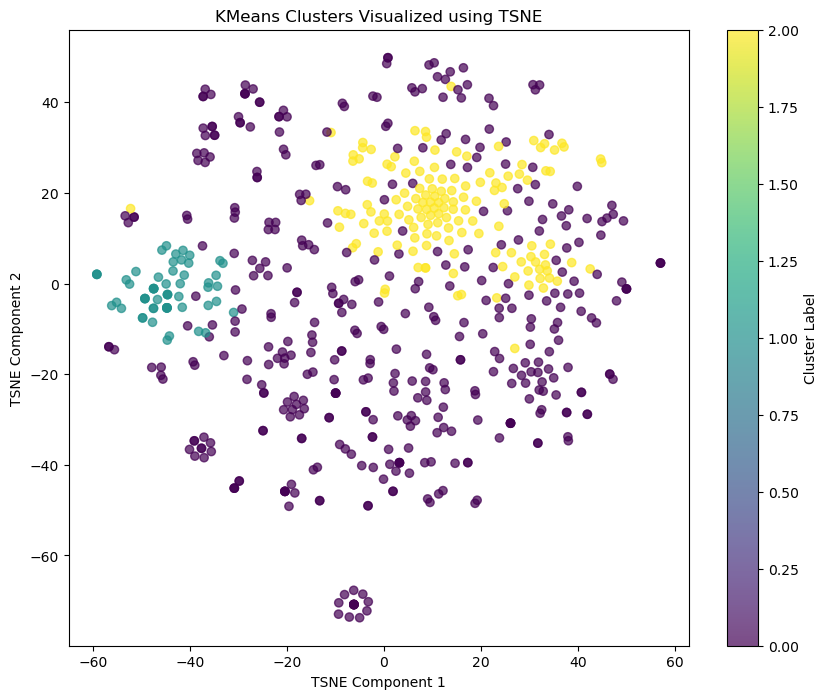

In [130]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# X is a sparse matrix, converting it to a dense array.
try:
    X_dense = X.toarray()
except NameError:
    raise NameError("TF-IDF matrix X is not defined. Please run the TF-IDF vectorization code before this snippet.")
except AttributeError:
    X_dense = X

# Reduce the TF-IDF features to 2 dimensions using TSNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_dense)

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=km.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("KMeans Clusters Visualized using TSNE")
plt.colorbar(scatter, label="Cluster Label")
plt.show()


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
     Deriving the WordCloud from the 3 clusters obtained without any stopwords
</div>


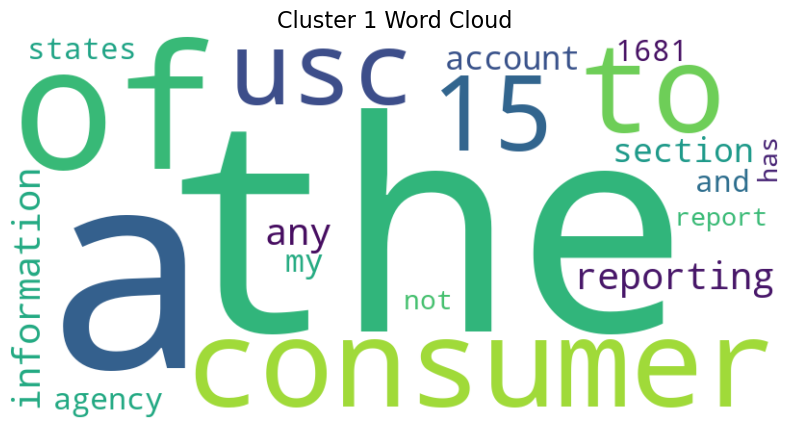

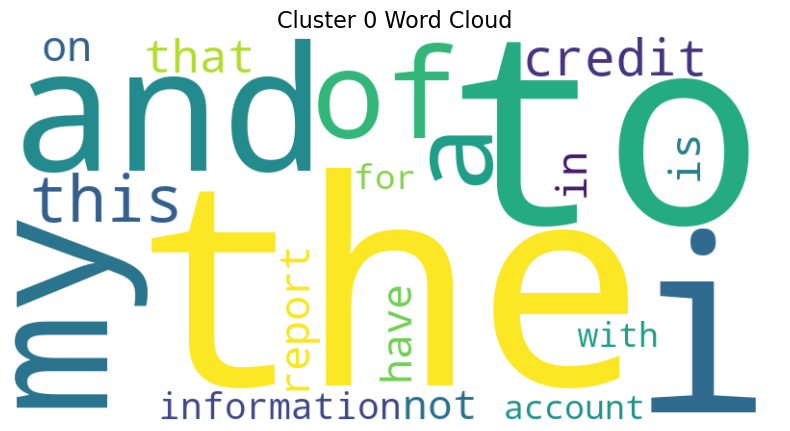

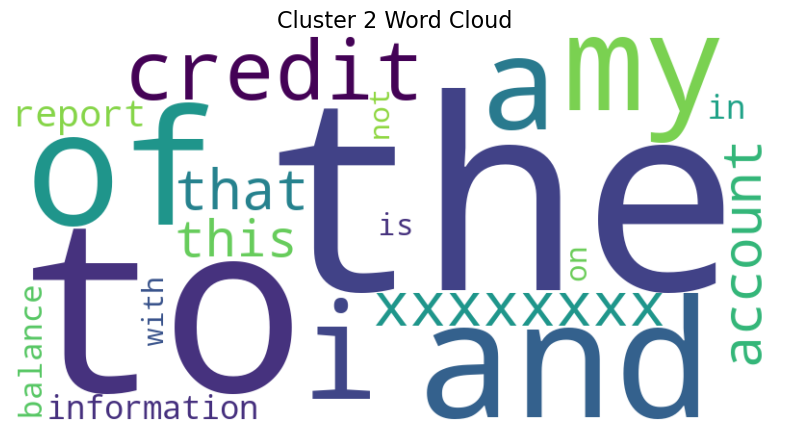

In [131]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Define the set of words to remove
remove_words = {"xx", "xxxx", "xxxxxx"}

# First, group complaints by their assigned cluster label.
clusters = {}
for label, complaint in zip(km.labels_, complaints):
    clusters.setdefault(label, []).append(complaint)

# Create word clouds for each cluster
for cluster_label, texts in clusters.items():
    # Combine all text for the current cluster
    cluster_text = " ".join(texts).lower()
    
    # Remove punctuation (keep only letters, numbers, and whitespace)
    cluster_text = re.sub(r'[^\w\s]', '', cluster_text)
    
    # Tokenize the text into words
    words = cluster_text.split()
    
    # Filter out unwanted words
    filtered_words = [w for w in words if w not in remove_words]
    
    
    word_counts = Counter(filtered_words)
    top_words = dict(word_counts.most_common(20))
    
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(top_words)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Cluster {cluster_label} Word Cloud", fontsize=16)
    plt.axis('off')
    plt.show()


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
     Deriving the WordCloud from the 3 clusters obtained WITH stopwords
</div>


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


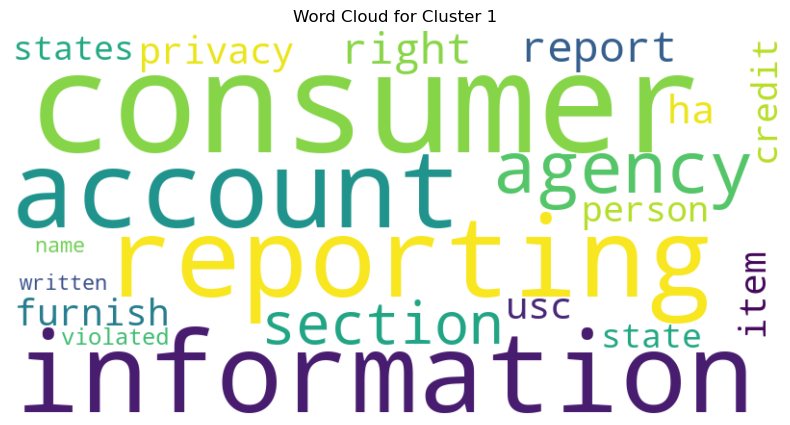

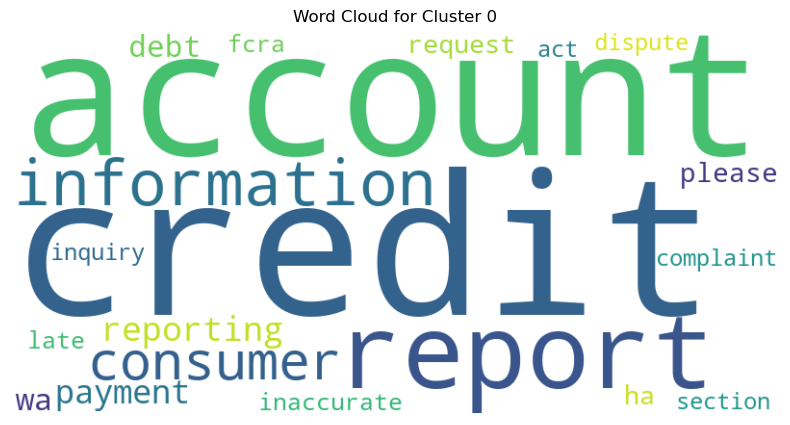

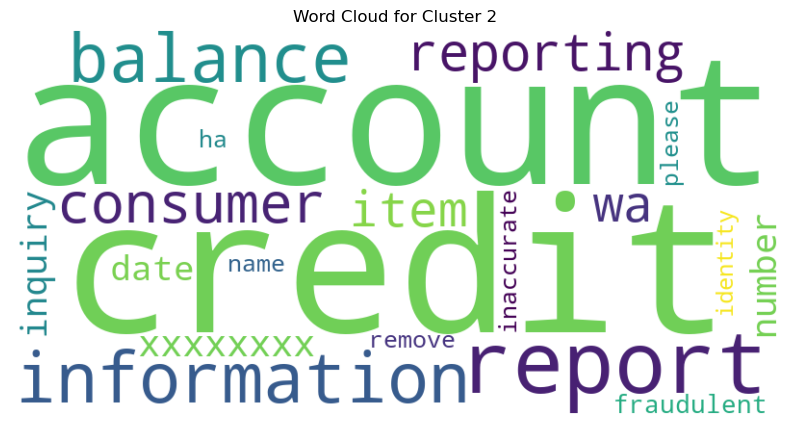

In [132]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Define stopwords and unwanted words to be filtered out
stop_words = set(stopwords.words('english'))
unwanted_words = {"xx", "xxxx", "xxxxxx", "xxxxxx xx"}

for label, doc in zip(km.labels_, lemmatized_complaints):  # using lemmatized_complaints for cleaner text
    clusters.setdefault(label, []).append(doc)


for cluster_id, docs in clusters.items():
    # Combine all documents in the cluster into one string
    cluster_text = " ".join(docs)
    
    # Tokenize the text into words
    words = word_tokenize(cluster_text)
    
    # Filter out stopwords, unwanted words, and non-alphabetic tokens
    filtered_words = [
        word.lower() for word in words 
        if word.lower() not in stop_words 
        and word.lower() not in unwanted_words
        and re.match("^[a-zA-Z]+$", word)
    ]
    freq = Counter(filtered_words)
    top_20 = dict(freq.most_common(20))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_20)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
     Saving the DataFrame with clusters to a CSV file
</div>


In [187]:
df['cluster'] = km.labels_

output_filename = 'clusters_output.csv'
df.to_csv(output_filename, index=False)
print(f"Clusters have been saved to {output_filename}")

Clusters have been saved to clusters_output.csv


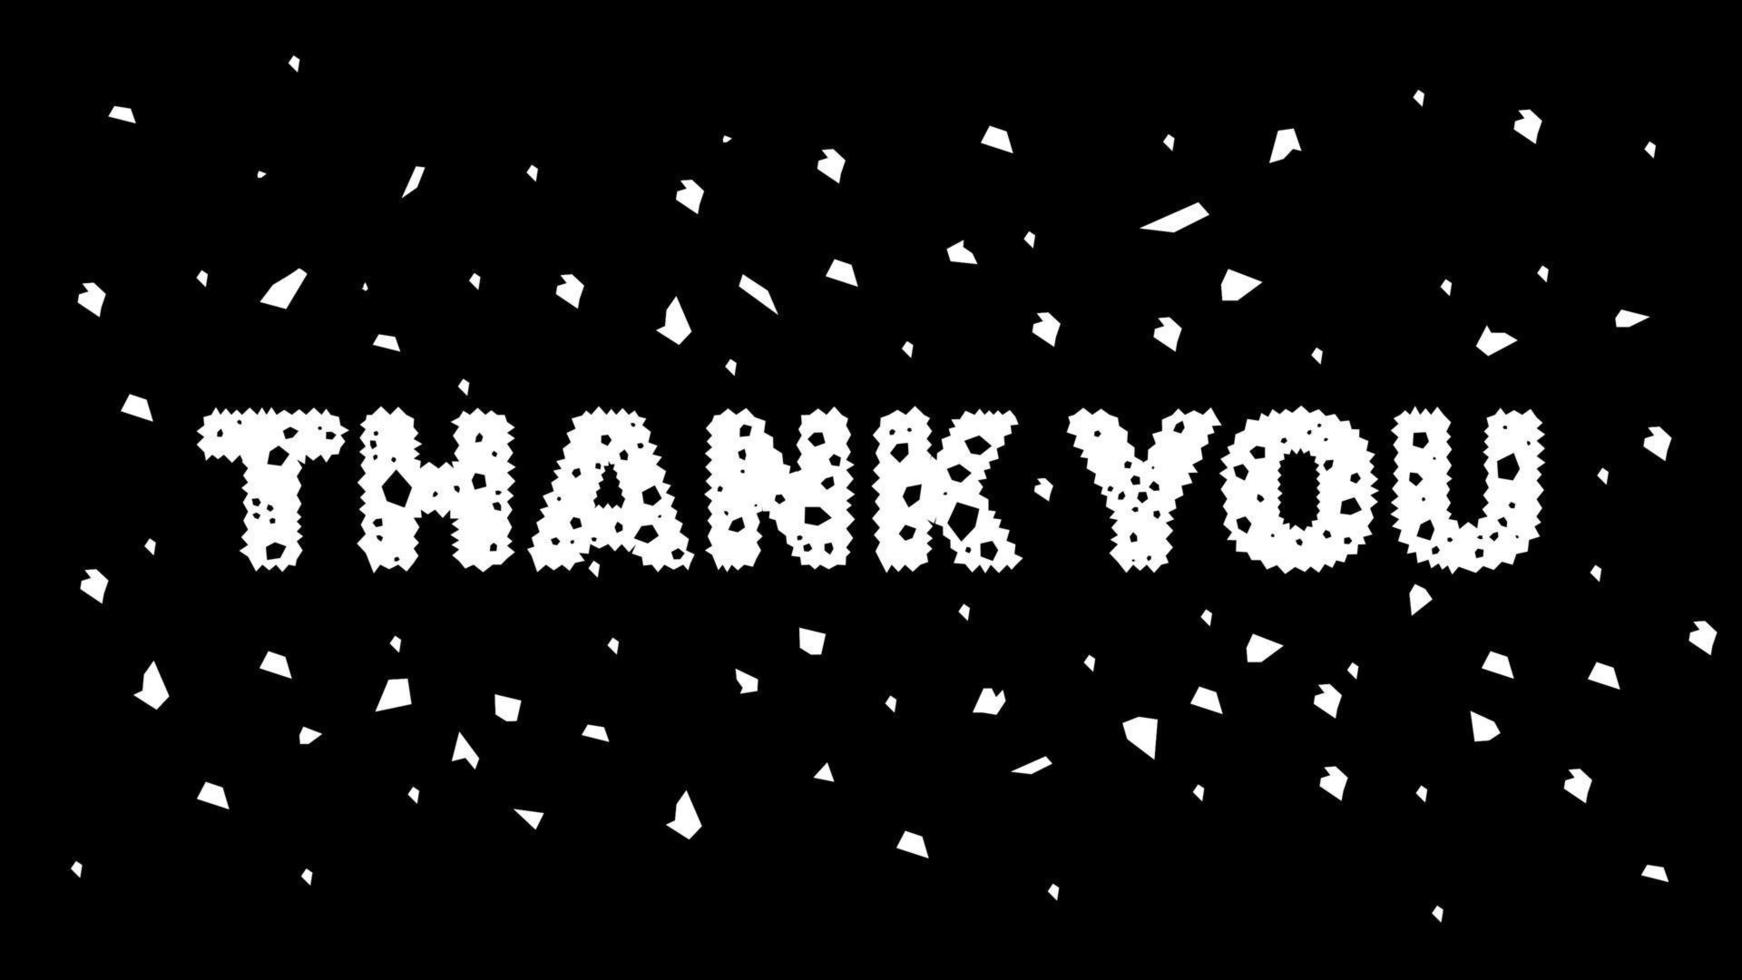